In [ ]:
# This is a simple spherical projectile shot up and subject to gravity and drag forces

In [5]:
import sympy as sp
import sympy.physics.mechanics as me

m      = sp.symbols("m")
g      = sp.Symbol("g")
drag  = sp.Symbol('drag')

x  = me.dynamicsymbols('x')
z  = me.dynamicsymbols('z')
u  = me.dynamicsymbols('u')
v  = me.dynamicsymbols('v')

xd = me.dynamicsymbols('x', 1)
zd = me.dynamicsymbols('z', 1)
bounceforce = me.dynamicsymbols('F')

B = me.ReferenceFrame('B')
origin  = me.Point('origin')
origin.set_vel(B, 0)
ballvel = u*B.x + v*B.z

ballpt = origin.locatenew('ball', x*B.x + z*B.z)
ballpt.set_vel(B, ballvel)

ball = me.Particle('ball', ballpt, m)
kinematic_equations = [u-xd, v-zd]

forces          = [ (ballpt, -g*m*B.z - drag*ballvel.magnitude()*ballvel + bounceforce*B.z) ]
particles       = [ ball ]


kane = me.KanesMethod(B, 
                      q_ind=[x, z], 
                      u_ind=[u, v],
                      kd_eqs=kinematic_equations)
fr, frstar = kane.kanes_equations(particles, forces)
fr

Matrix([
[             -drag*sqrt(u(t)**2 + v(t)**2)*u(t)],
[-drag*sqrt(u(t)**2 + v(t)**2)*v(t) - g*m + F(t)]])

In [47]:
from pydy.system import System
import numpy as np

def bounceforcefunc(X, t):
    z = X[1]
    return sp.Piecewise((1/(z**2 + 0.001), z<0.1), (0, True))

sys = System(kane,
             constants={m: 1.0, g: 9.8, drag:0.05},
             specifieds={ bounceforce: bounceforcefunc },
             initial_conditions={x:0, z:0, u:7, v:30},
             times=np.linspace(0.0, 9.0, 500))
y1 = sys.integrate()



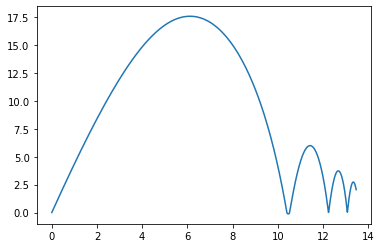

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(y1[:,0], y1[:,1])

plt.show()

In [49]:
import pydy.viz as pv
import IPython.display

ground_viz = pv.Plane(10, 10, color='blue')
ball_viz = pv.Sphere(0.5, color='red')
reference_frame, origin = B, origin
v1 = pv.VisualizationFrame('plate', B, origin, ground_viz)
v2 = pv.VisualizationFrame('ball', B, ballpt, ball_viz)
scene = pv.Scene(reference_frame, origin, v1, v2, system=sys)

scene.display_ipython()
IPython.display.display(IPython.display.HTML(scene._html_widget.value))

Button(description='Rerun Simulation', style=ButtonStyle(), _dom_classes=('btn-info',))

HTML(value='<!DOCTYPE html>\n<html lang="en">\n\n  <head>\n\n    <meta http-equiv="Content-Type" content="text…